In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("/content/heart.csv")  # Correct path in Colab
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Check for missing values
print("Missing Values:\n", df.isnull().sum())

#Split features and target
X = df.drop('HeartDisease', axis=1)  # Replace 'target' with your actual target column name
y = df['HeartDisease']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
#Train a Random Forest Classifier

#Identify categorical columns for one-hot encoding
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

#One-hot encode training and test sets
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

#Match columns in training and test sets
#Add missing columns to test
for col in set(X_train_encoded.columns) - set(X_test_encoded.columns):
    X_test_encoded[col] = 0
#Add missing columns to train (very rare but good to handle)
for col in set(X_test_encoded.columns) - set(X_train_encoded.columns):
    X_train_encoded[col] = 0

#Reorder test set columns to match train set
X_test_encoded = X_test_encoded[X_train_encoded.columns]

#Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

#Predict on test set
y_pred = model.predict(X_test_encoded)

#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[65 12]
 [12 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



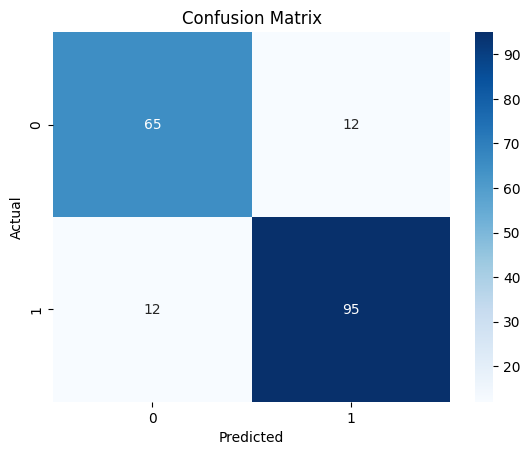

In [ ]:
#Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


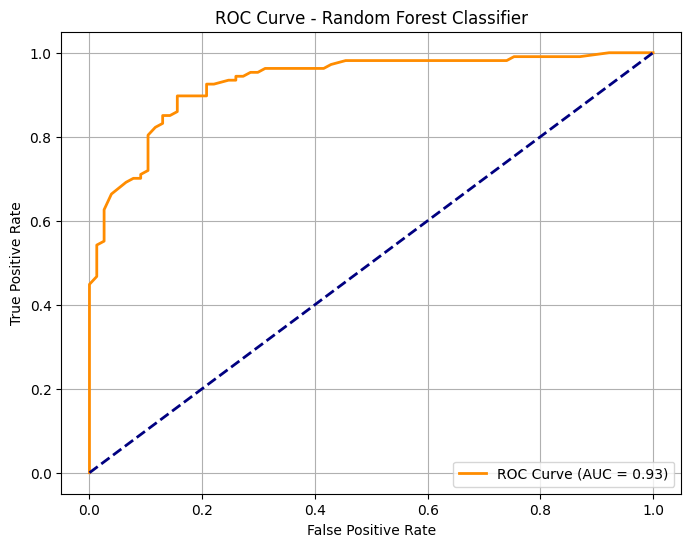

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib

# Get predicted probabilities for class 1 (positive class)
y_probs = model.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()
